In [0]:
import sys
from math import sqrt
import numpy as np
from PIL import Image
import copy
import matplotlib.pyplot as plt

In [0]:
entradaImg = "imagens/2817540617_Easy-Resize.jpg"
saidaImg="saida/saida_2817540617_Easy-Resize"


imagem_original = Image.open(entradaImg)
imagem = imagem_original.copy()
img_array = np.asarray(imagem)

img_height = len(img_array)
img_width = len(img_array[0])

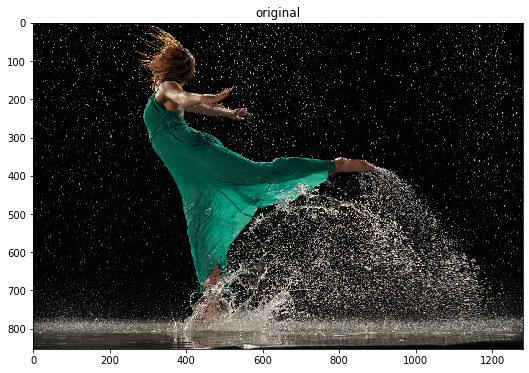

In [0]:
    plt.figure(figsize = (60,6))
    plt.title("original")
    plt.imshow(imagem, aspect="equal", origin="upper")

In [0]:
# -------- RGB - YIQ - RGB --------------------------

In [0]:
""" 
Essa funcao calcula os valores de Y I Q dados os valores de RGB
Conversão de RGB para YIQ
# Y = 0.299R + 0.587G + 0.114B
# I = 0.596R – 0.274G – 0.322B
# Q = 0.211R – 0.523G + 0.312B
"""
def RGB_YIQ(img_array):
    img_copy = img_array.copy().astype(float)
    for i in range(len(img_array)): # percorre  linhas
        for j in range(len(img_array[0])): # percorre  colunas
            img_copy[i][j][0] = 0.299 * img_array[i][j][0] + 0.587 * img_array[i][j][1] + 0.114 * img_array[i][j][2]  #Y
            img_copy[i][j][1] = 0.596 * img_array[i][j][0] - 0.274 * img_array[i][j][1] - 0.322 * img_array[i][j][2]  #I
            img_copy[i][j][2] = 0.211 * img_array[i][j][0] - 0.523 * img_array[i][j][1] + 0.312 * img_array[i][j][2]  #Q
            
    return img_copy

In [0]:
"""
Essa funcao calcula os valores de RGB dados os valores de YIQ, retornna uma nova imagem


Conversão de YIQ para RGB
R = 1.000 Y + 0.956 I + 0.621 Q
G = 1.000 Y – 0.272 I – 0.647 Q
B = 1.000 Y – 1.106 I + 1.703 Q
"""

def YIQ_RGB(img_array):
    shape = img_array.shape
    rgb = np.zeros(img_array.shape, dtype = int)
    for i in range(0,shape[0]): 
        for j in range(0,shape[1]):
            rgb[i,j,0] = (1.000*img_array[i,j,0] + 0.956*img_array[i,j,1] + 0.621*img_array[i,j,2]) #R
            rgb[i,j,1] = (1.000*img_array[i,j,0] - 0.272*img_array[i,j,1] - 0.647*img_array[i,j,2]) #G
            rgb[i,j,2] = (1.000*img_array[i,j,0] - 1.106*img_array[i,j,1] + 1.703*img_array[i,j,2]) #B
            for c in range(0,3): #TESTE PARA VERIFICAR OS LIMITES ENTRE 0-255 DA IMAGEM RGB
                if(rgb[i,j,c]<0): #CASO SEJA MENOR Q 0
                    rgb[i,j,c]=0  #SETA PRA 0
                if(rgb[i,j,c]>255):
                    rgb[i,j,c]=255  #SETA PRA 255
  
    return rgb


In [0]:

RGBtoYIQ = RGB_YIQ(img_array)

YIQtoRGB = YIQ_RGB(RGBtoYIQ)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


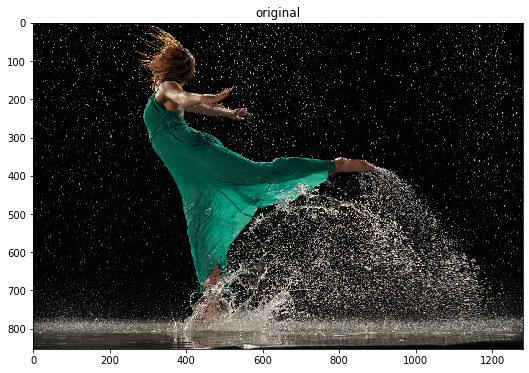

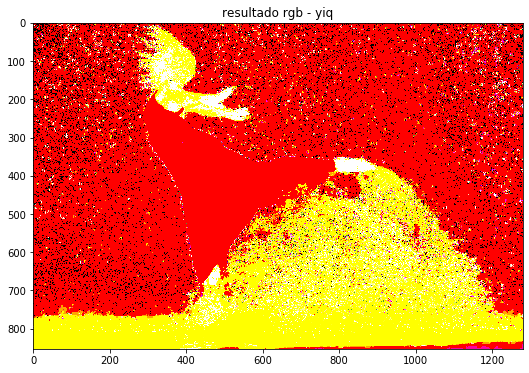

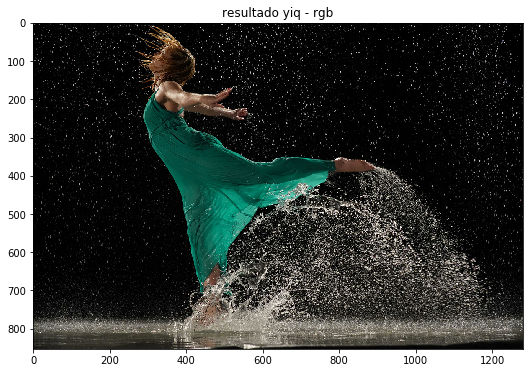

In [0]:
    plt.figure(figsize = (60,6))
    plt.title("original")
    plt.imshow(imagem, aspect="equal", origin="upper")
    
    plt.figure(figsize = (60,6))
    plt.title("resultado rgb - yiq")
    plt.imshow(RGBtoYIQ, aspect="equal", origin="upper")

    img2 = np.uint8(RGBtoYIQ)
    plt.imsave('saida/RGBtoYIQ.jpg', img2 )


    plt.figure(figsize = (60,6))
    plt.title("resultado yiq - rgb")
    plt.imshow(YIQtoRGB, aspect="equal", origin="upper")

    img3 = np.uint8(YIQtoRGB)
    plt.imsave('saida/YIQtoRGB.jpg', img3 )

In [0]:
#Monocromaticas RGB (CINZA)

def Mono(imagem):

	width, height = imagem.size   #calcula m x n da imagem
	newR = Image.new("RGB",(width,height))	#cria imagens com a mesma dimensao m x n
	monoB = Image.new("RGB",(width,height))
	monoG = Image.new("RGB",(width,height))

	red = newR.load()			#carrega os vetores criados (it reads the file content, decodes it, and expands the image into memory)
	green= monoB.load()
	blue = monoG.load()

	for k in range(0,width): #itera pela linha
		for j in range(0,height):#itera pela coluna

			pixel = imagem.getpixel((k,j))	#pega o valor do pixel atual ex: (1,1)

            
			r = pixel[0]		#convencao para diminuir codigo
			g = pixel[1]
			b = pixel[2]

			cinzaR = r * 0.299 + r * 0.587 + r * 0.114		#multiplicacao das bandas cinza (iguais) pelo valor de Y que representa a LUMINANCIA da imagem no YIQ
			cinzaG = g * 0.299 + g * 0.587 + g * 0.114 
			cinzaB = b * 0.299 + b * 0.587 + b * 0.114 

			red[k,j]	= (int(cinzaR),int(cinzaR),int(cinzaR))		#salva os novos valores nas matrizes de imagem
			green[k,j]	= (int(cinzaG),int(cinzaG),int(cinzaG))
			blue[k,j]	= (int(cinzaB),int(cinzaB),int(cinzaB))


	return monoR, monoB, monoG
	

In [0]:
[MonoR, MonoG, MonoB] = Mono(imagem)
MonoR.save('saida/'+saidaImg+'_MonoR.png')
MonoG.save('saida/'+saidaImg+'_MonoG.png')
MonoB.save('saida/'+saidaImg+'MonoB.png')


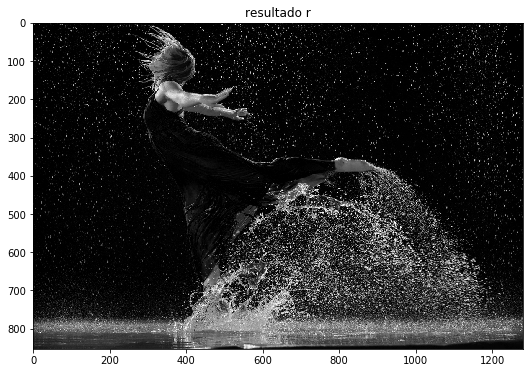

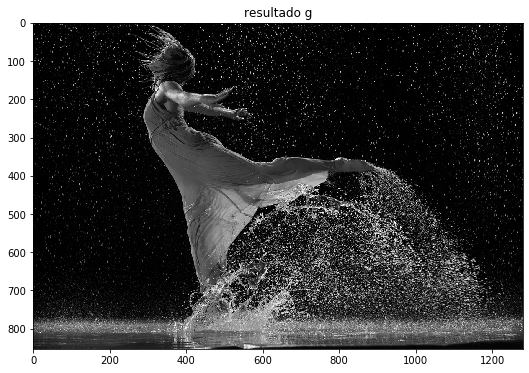

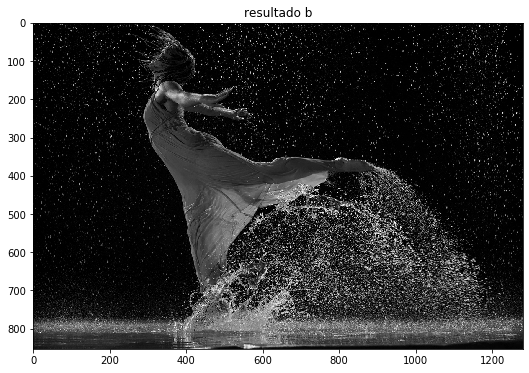

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado r")
plt.imshow(MonoR, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado g")
plt.imshow(MonoG, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado b")
plt.imshow(MonoB, aspect="equal", origin="upper")

In [0]:
#Exibicao de bandas r g b isoladas
#mantem o valor de uma das bandas rgb igual, e zera as restantes  , ex:(255,0,0)
def Banda_RGB(imagem):
	width, height = imagem.size #calcula m x n da imagem

	bandaR = Image.new("RGB",(width,height)) #cria imagens com a mesma dimensao m x n
	bandaB = Image.new("RGB",(width,height))
	bandaG = Image.new("RGB",(width,height))

	red = bandaR.load() #carrega os vetores criados
	green= bandaB.load()
	blue = bandaG.load()

	for i in range(0,3):#refaz a operacao 3 vezes 1 pra cada banda
		for k in range(0,width):#itera pela linha
			for j in range(0,height): #itera pela coluna

				pixel = imagem.getpixel((k,j)) #sel valor do pixel ex: (0,0)

				r = pixel[0]  #convencao pra diminuir codigo
				g = pixel[1]
				b = pixel[2]
					
				if(i==0): 
					g = 0
					b = 0			
					red[k,j] = (int(r),int(g),int(b))
				if(i==1):
					r = 0
					b = 0
					green[k,j] = (int(r),int(g),int(b))
				if(i==2):
					r = 0
					g = 0
					blue[k,j] = (int(r),int(g),int(b))

	return bandaR, bandaB, bandaG


In [0]:
[bandaR, bandaG, bandaB] = Banda_RGB(imagem)
bandaR.save('saida/'+saidaImg+'bandaR.png')
bandaG.save('saida/'+saidaImg+'bandaG.png')
bandaB.save('saida/'+saidaImg+'bandaB.png')

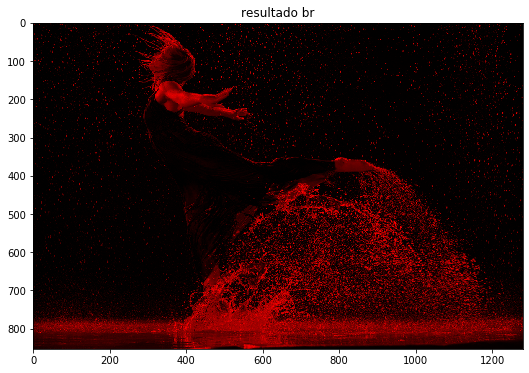

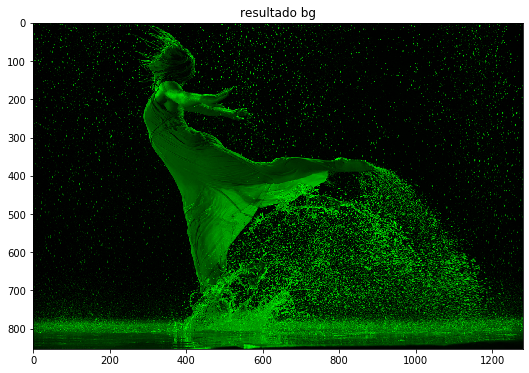

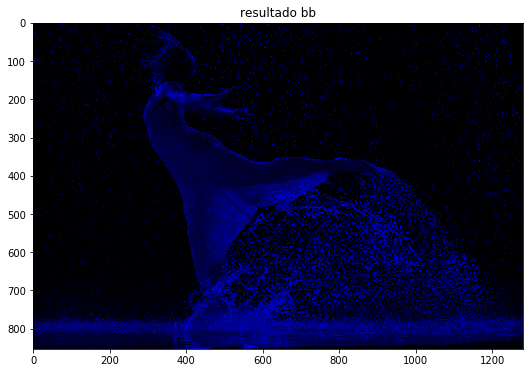

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado br")
plt.imshow(bandaR, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado bg")
plt.imshow(bandaG, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado bb")
plt.imshow(bandaB, aspect="equal", origin="upper")

In [0]:
#NEGATIVO 

def Negativo_rgb(imagem,mode):
	width, height = imagem.size
	new = Image.new("RGB",(width,height))
	pixels = new.load()

	for k in range(0,width):
		for j in range(0,height):

			pixel = imagem.getpixel((k,j))

			r = pixel[0]
			g = pixel[1]
			b = pixel[2]
			if (mode == 'O'):
				r = (-1*r+255)  #MULTIPLICA CADA BANDA POR -1 E SOMA 255 (negativo em rgb)
				g = (-1*g+255)
				b = (-1*b+255)
		

			elif (mode == "R"):

				r = (-1*r+255)  
				g = g
				b = b
			
			elif (mode == 'G'):
				r = r  
				g = (-1*g+255)
				b = b

			elif (mode == 'B'):
				r = r  
				g = g
				b = (-1*b+255)

			pixels[k,j] = (int(r),int(g),int(b))

	return new


In [0]:
def Negativo_yiq(img, height, width):
    original = copy.deepcopy(img)
    
    yiq_img = RGB_YIQ(original)
    
    for y in range(height):
        for x in range(width):
            yiq_img[y][x][0] = 255 - img[y][x][0]

    rgb_img = YIQ_RGB(yiq_img)  
    return rgb_img

In [0]:
negativo = Negativo_rgb(imagem,'O')
negativo.save('saida/'+saidaImg+'negativoORIGINAL.png')

negativor = Negativo_rgb(imagem,'R')
negativor.save('saida/'+saidaImg+'negativor.png')

negativog = Negativo_rgb(imagem,'G')
negativog.save('saida/'+saidaImg+'negativog.png')

negativob = Negativo_rgb(imagem,'B')
negativob.save('saida/'+saidaImg+'negativob.png')




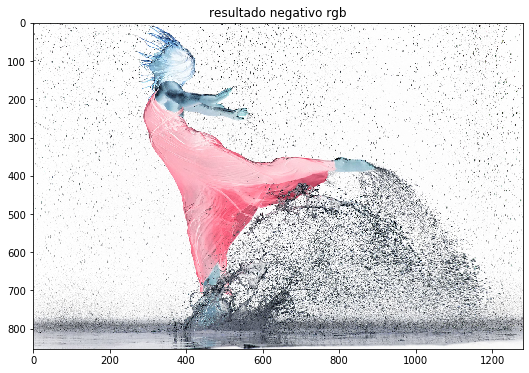

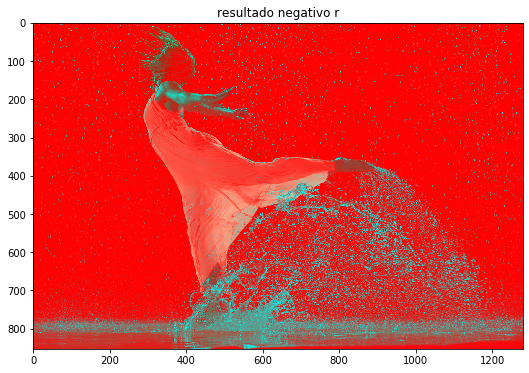

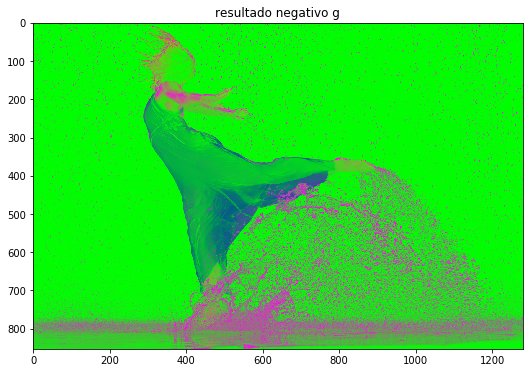

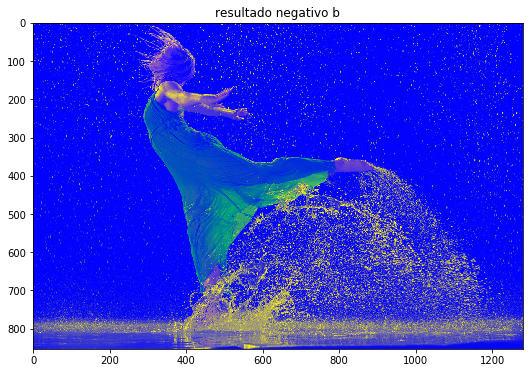

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado negativo rgb")
plt.imshow(negativo, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado negativo r")
plt.imshow(negativor, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado negativo g")
plt.imshow(negativog, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado negativo b")
plt.imshow(negativob, aspect="equal", origin="upper")

In [0]:
negative_yiq = Negativo_yiq(img_array, img_height, img_width)


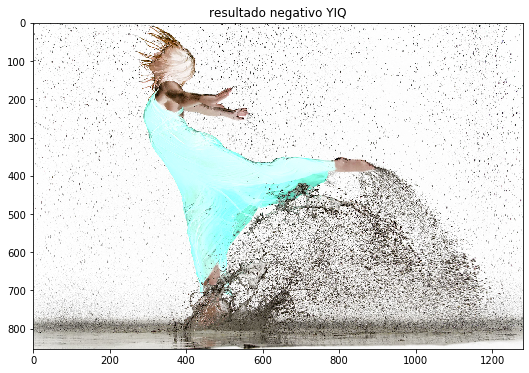

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado negativo YIQ")
plt.imshow(negative_yiq, aspect="equal", origin="upper")

In [0]:
# Brilho Multiplicativo


def BrilhoMultiplicativo(imagem,d,mode):
	#mode = O aplica na imagem original, R no red, G no green, e B no blue
	#de acordo com o modo pelo usuario definido, 
	#vai multiplicar a banda r, g, b, ou todas, pelo valor de "d" passado como parametro pelo usuario

	width, height = imagem.size
	new = Image.new("RGB",(width,height))
	pixels = new.load()

	for k in range(0,width):
		for j in range(0,height):

			pixel = imagem.getpixel((k,j))

			r = pixel[0]
			g = pixel[1]
			b = pixel[2]
			if mode == 'O':  #modo o (original) , todas as bandas x d
				r = r*d
				g = g*d
				b = b*d

			elif mode == 'R':		#modo R, apenas a banda r x d
				r = r*d
				g = g
				b = b
			elif mode == 'G':
				r = r
				g = g*d
				b = b
			elif mode == 'B':
				r = r
				g = g
				b = b*d

			#####
			r = min(max(r,0),255)		#limita os valores do rgb entre [0.255]
			g = min(max(g,0),255)
			b = min(max(b,0),255)

			pixels[k,j] = (int(r),int(g),int(b))

	return new

In [0]:
brilhoM = BrilhoMultiplicativo(imagem,2, "O")
brilhoM.save('saida/'+saidaImg+'BrilhoMultiplicativo.png')

brilhoR = BrilhoMultiplicativo(imagem,2, "R")
brilhoR.save('saida/'+saidaImg+'BrilhoMultiplicativoR.png')

brilhoG = BrilhoMultiplicativo(imagem,2, "G")
brilhoG.save('saida/'+saidaImg+'BrilhoMultiplicativoG.png')

brilhoB = BrilhoMultiplicativo(imagem,2, "B")
brilhoB.save('saida/'+saidaImg+'BrilhoMultiplicativoB.png')

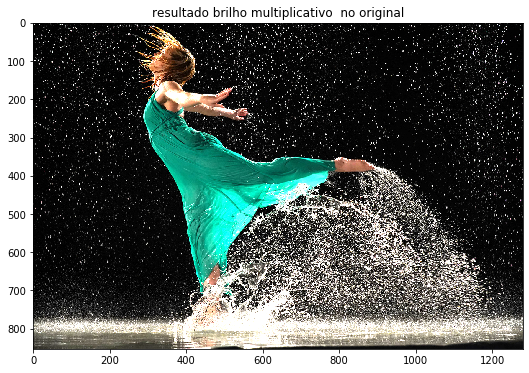

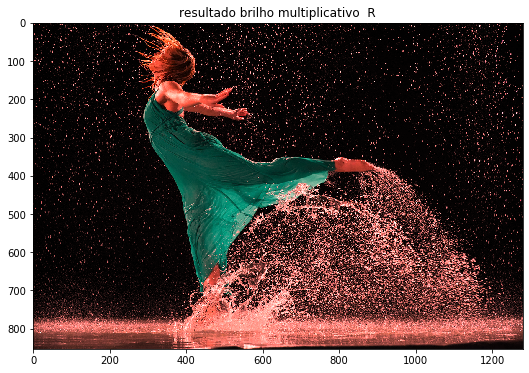

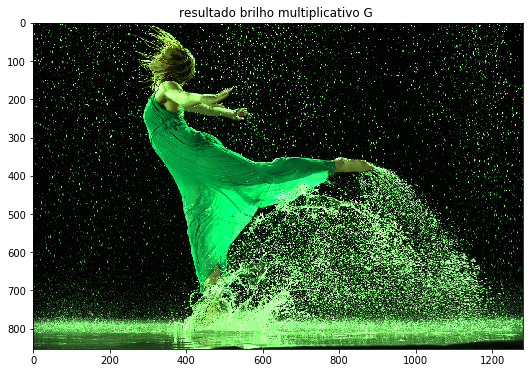

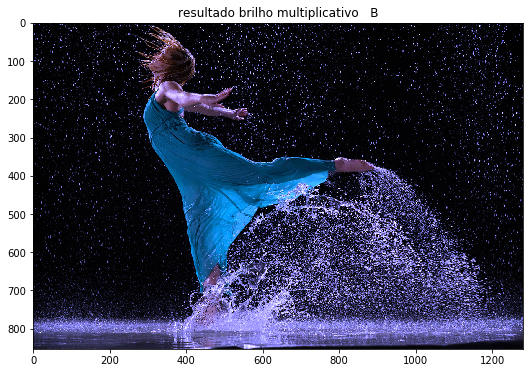

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado brilho multiplicativo  no original")
plt.imshow(brilhoM, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado brilho multiplicativo  R")
plt.imshow(brilhoR, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado brilho multiplicativo G ")
plt.imshow(brilhoG, aspect="equal", origin="upper")

plt.figure(figsize = (60,6))
plt.title("resultado brilho multiplicativo   B")
plt.imshow(brilhoB, aspect="equal", origin="upper")

In [0]:
#ABRIR MASCARA.TXT e outros txt
#formato(float) 
# m n
# 0 0 0 
# 1 1 1

def abrir_mascara(nome):
    mask_file = open(nome, 'rt')
    dimensions = tuple(np.array(mask_file.readline()[:-1].split(" ")).astype(int))
    mask = np.zeros(shape=dimensions)
    i = 0
    
    while(1):
        line = mask_file.readline()[:-1]
        if(line == ""):
            break
        values = np.array(line.split(" ")).astype(float)
        mask[i] = values
        i+= 1
        
    
    return mask, dimensions

In [0]:
mascara, dimensions = abrir_mascara("mascara.txt")
largura, altura = dimensions
print(largura, altura)
print(mascara)

3 3
[[0.1 0.2 0. ]
 [0.  0.  0. ]
 [0.  0.  0.4]]


In [0]:
#CONVOLUCAO

def conv(img_array, img_height, img_width, mascara):

    img = copy.deepcopy(img_array) #faz  uma  copia da img array passada para manipulacao
    print ("mascara original")

    print (mascara)

    mask = mascara[::-1,::-1]      #inverte os valores da mascara ( rebatimento )

    print("mascara rebatida")
    print(mask)

    
    # Dimensoes da imagem resultante
    i_dim = (len(img)  - len(mask) ) + 1
    j_dim = (len(img[0])  - len(mask[0]) ) + 1
    
    # Cria uma imagem com as dimensoes da final e preenche com zeros
    conv = np.array([[[0,0,0] for j in range(j_dim)] for i in range(i_dim)])
    #conv = np.zeros(img_array.shape).astype(float)

    print("dimensoes: ", i_dim , j_dim)
    # Faz convolucao
    print("Iniciando convolução...")
    for i in range(0,img_array.shape[0]-(m-1)): 
        for j in range(0,img_array.shape[1]-(n-1)):
            for i_m in range(0,m):
                for j_n in range(0,n):
                    conv[i,j,0]+=mask[i_m,j_n]*img_array[i+i_m,j+j_n,0]
                    conv[i,j,1]+=mask[i_m,j_n]*img_array[i+i_m,j+j_n,1]
                    conv[i,j,2]+=mask[i_m,j_n]*img_array[i+i_m,j+j_n,2]
        for c in range(0,3):
            if(conv[i,j,c]<0):
                conv[i,j,c]=0
            if(conv[i,j,c]>255):
                conv[i,j,c]=255
    #return conv
    print("Fim convolução")
    
    return np.uint8(conv)


In [0]:
mascara, dimensions = abrir_mascara("mascara.txt")
largura, altura = dimensions
conv_img = conv(img_array, largura, altura, mascara)


mascara original
[[0.1 0.2 0. ]
 [0.  0.  0. ]
 [0.  0.  0.4]]
mascara rebatida
[[0.4 0.  0. ]
 [0.  0.  0. ]
 [0.  0.2 0.1]]
dimensoes:  851 1278
Iniciando convolução...
Fim convolução


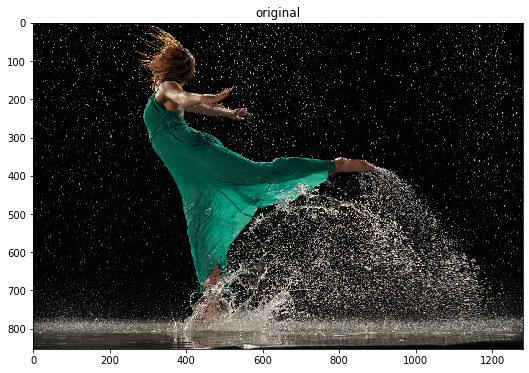

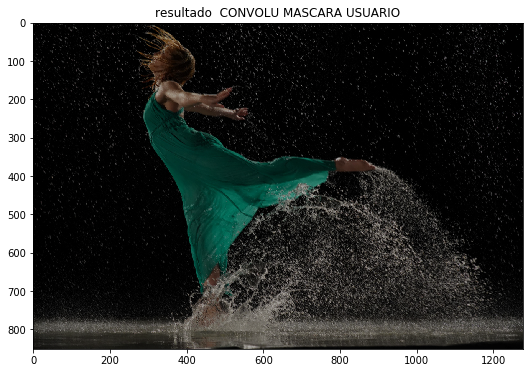

In [0]:
    plt.figure(figsize = (60,6))
    plt.title("original")
    plt.imshow(img_array, aspect="equal", origin="upper")

    plt.figure(figsize = (60,6))
    plt.title("resultado  CONVOLU MASCARA USUARIO")
    plt.imshow(conv_img, aspect="equal", origin="upper")

    im = Image.fromarray(conv_img)
    im.save("saida/conv_img.jpeg")

In [0]:
mascara, dimensions = abrir_mascara("SOBELHORIZONTAL.txt")
largura, altura = dimensions
conv_img = conv(img_array, largura, altura, mascara)

mascara original
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
mascara rebatida
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]
dimensoes:  851 1278
Iniciando convolução...
Fim convolução


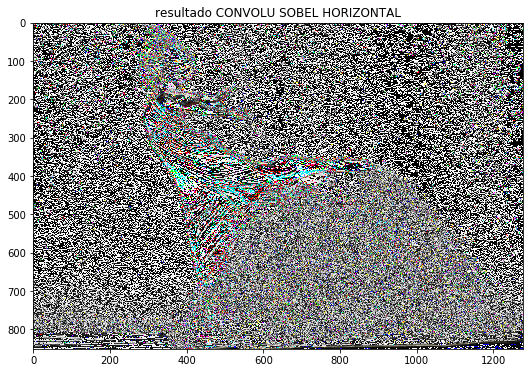

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado CONVOLU SOBEL HORIZONTAL")
plt.imshow(conv_img, aspect="equal", origin="upper")

im = Image.fromarray(conv_img)
im.save("saida/sobelHORIZONTAL.jpeg")

In [0]:
mascara, dimensions = abrir_mascara("SOBELVERTICAL.txt")
largura, altura = dimensions
conv_img = conv(img_array, largura, altura, mascara)

mascara original
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
mascara rebatida
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
dimensoes:  851 1278
Iniciando convolução...
Fim convolução


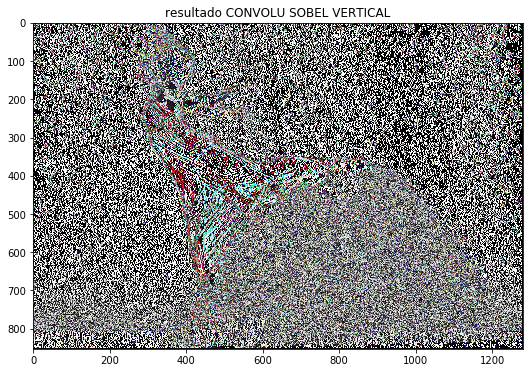

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado CONVOLU SOBEL VERTICAL")
plt.imshow(conv_img, aspect="equal", origin="upper")

im = Image.fromarray(conv_img)
im.save("saida/sobelVERTICAL.jpg")

In [0]:
mascara, dimensions = abrir_mascara("media.txt")
largura, altura = dimensions
conv_img = conv(img_array, largura, altura, mascara)

mascara original
[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.1 ]]
mascara rebatida
[[0.1  0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]
dimensoes:  851 1278
Iniciando convolução...
Fim convolução


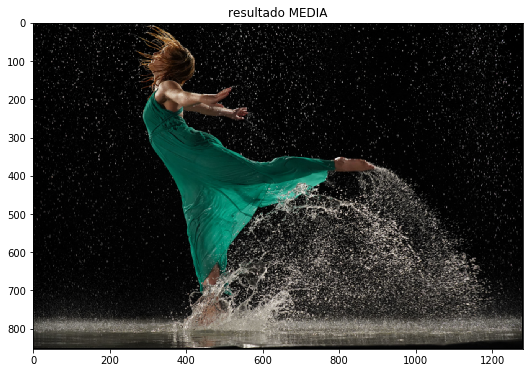

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado CONVOLU MEDIA")
plt.imshow(conv_img, aspect="equal", origin="upper")

im = Image.fromarray(conv_img)
im.save("saida/media.jpg")

In [0]:
def mediana(img_array, n, m):

    img = copy.deepcopy(img_array)
    
    count_i = (1 + (len(img) -1) - (n -1)) #calcula valor de i (iteracoes)
    count_j = (1 + (len(img[0]) -1)- (m -1)) #calcula valor de j (iteracoes)
    
    # Dimensoes da imagem resultante
    i_dim = (len(img)  - n ) + 1
    j_dim = (len(img[0])  - m ) + 1
    
    img_conv = np.array([[[0,0,0] for j in range(j_dim)] for i in range(i_dim)])
    
    print("dimensoes: ", i_dim , j_dim)

    print("Iniciando Mediana...")

    for i in range(count_i):
        for j in range(count_j):
            sub = img[i:i+n, j:j+m]
            resultado_parcial = [np.median(sub[:,:,0]), np.median(sub[:,:,1]), np.median(sub[:,:,2])]
            img_conv[i][j] = resultado_parcial

    print("Fim Mediana")
    
    return np.uint8(img_conv)

In [0]:
median_img = mediana(img_array, 5,5)


Num pixels:  1083324
Iniciando Mediana...
Fim Mediana


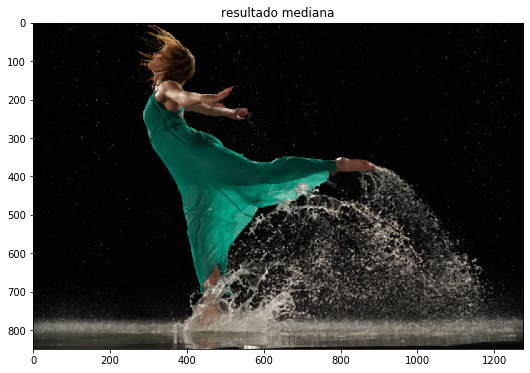

In [0]:
plt.figure(figsize = (60,6))
plt.title("resultado mediana")
plt.imshow(median_img, aspect="equal", origin="upper")

im = Image.fromarray(median_img)
im.save("saida/mediana_img.jpeg")



In [0]:
#-----------PARTE NAO FINALIZADA :  MODA 